# Health Insurance Charges Prediction

### 1. Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv ("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Cleaning

In [4]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### 3. Visulization

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


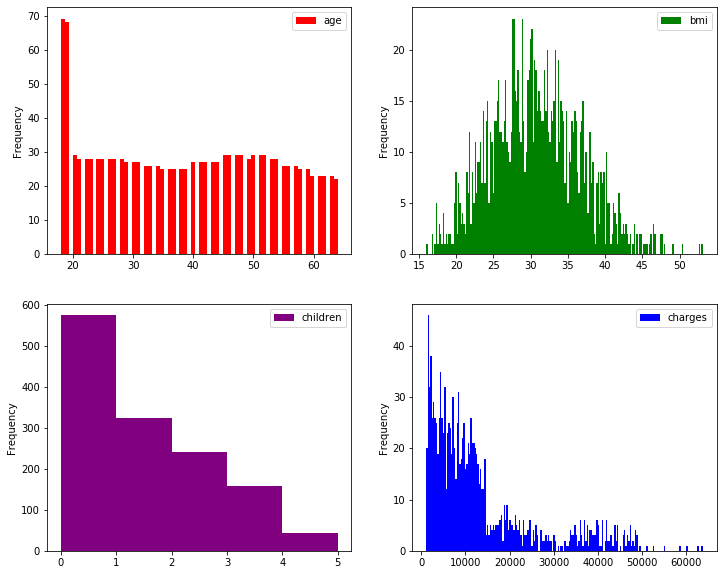

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="r", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=200, color="g", ax=axes[0][1])
df.plot(kind="hist", y="children", bins=5, color="purple", ax=axes[1][0])
df.plot(kind="hist", y="charges", bins=200, color="b", ax=axes[1][1])
plt.show()

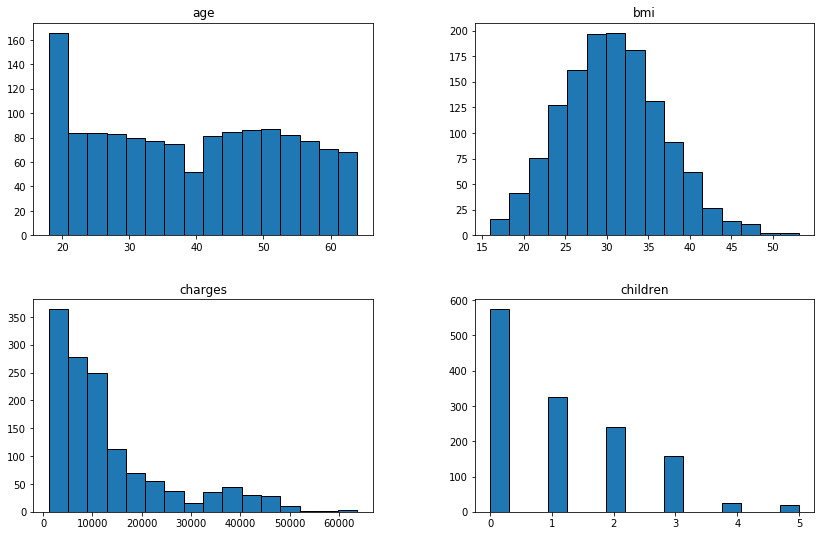

In [9]:
df[['age','bmi','children','charges']].hist(figsize=(14, 9),bins=16,linewidth='1',edgecolor='k',grid=False)
plt.show()

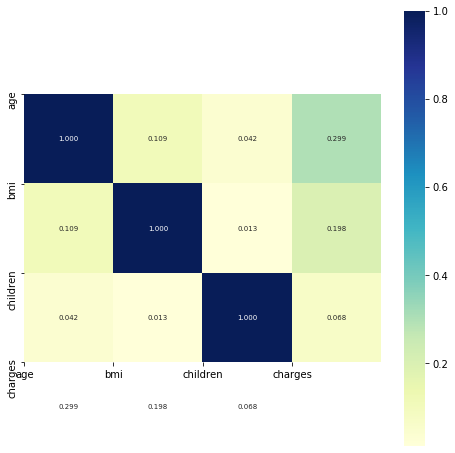

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='YlGnBu', annot=True, fmt=".3f", square= True, annot_kws={'size':7})
plt.xticks(range(len(corrmat.columns)), corrmat.columns)
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
plt.show()

The heatmap indicates that there is a strong correlation between personal's age and insurance charge (0.299) while the correlation between bmi and number of children against insurance charges are weaker.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

<Figure size 360x360 with 0 Axes>

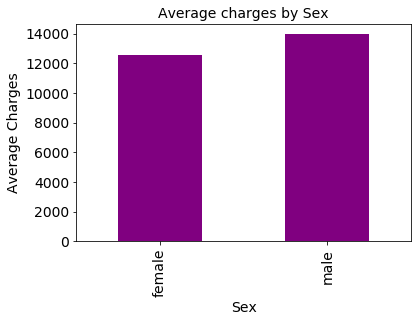

In [11]:
fig = plt.figure(figsize = (5, 5))
df[['sex', 'charges']].groupby('sex').mean().plot(kind = 'bar', color = 'purple', legend = False)
plt.title('Average charges by Sex', fontsize = 14)
plt.xlabel('Sex', fontsize = 14)
plt.ylabel('Average Charges', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text yticklabel objects>)

<Figure size 360x360 with 0 Axes>

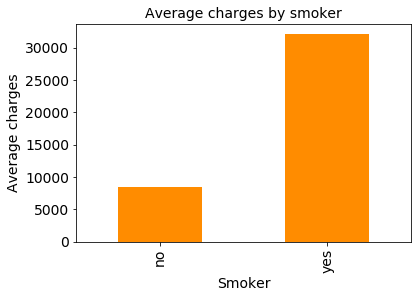

In [12]:
fig = plt.figure(figsize = (5, 5))
df[['smoker', 'charges']].groupby('smoker').mean().plot(kind = 'bar', color = 'darkorange', legend = False)
plt.title('Average charges by smoker', fontsize = 14)
plt.xlabel('Smoker', fontsize = 14)
plt.ylabel('Average charges', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

<Figure size 360x360 with 0 Axes>

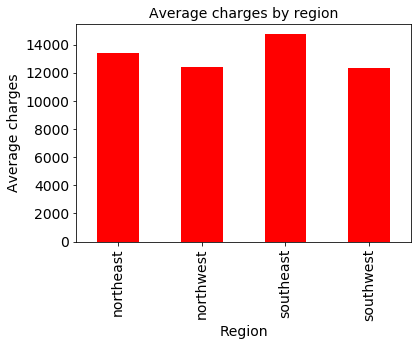

In [13]:
fig = plt.figure(figsize = (5, 5))
df[['region', 'charges']].groupby('region').mean().plot(kind = 'bar', color = 'red', legend = False)
plt.title('Average charges by region', fontsize = 14)
plt.xlabel('Region', fontsize = 14)
plt.ylabel('Average charges', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

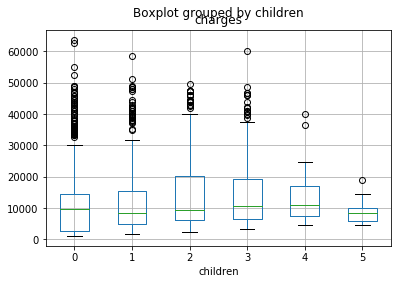

In [14]:
df.boxplot(column='charges',by = 'children')

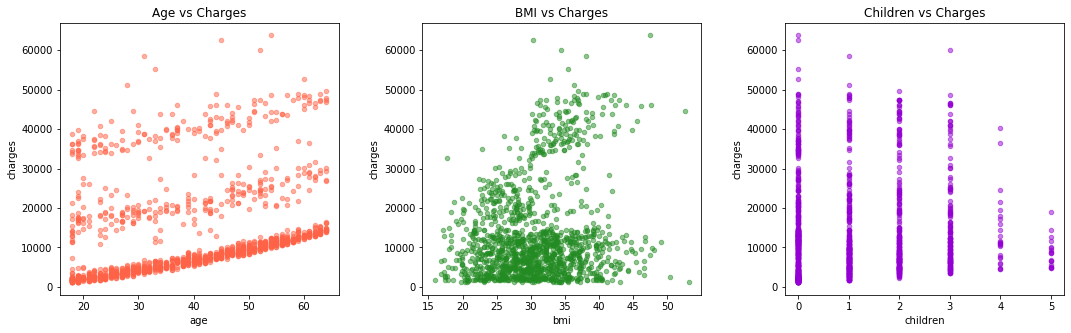

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.subplots_adjust(wspace=0.3)
df.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='tomato', ax=axes[0], title="Age vs Charges")
df.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='forestgreen', ax=axes[1], title="BMI vs Charges")
df.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='darkviolet', ax=axes[2], title="Children vs Charges")
plt.show()